오늘은 단어와 문서의 빈도를 분석하는 tf-idf에 대한 내용입니다.

**참고 : TEXT MINING with R**


1장 : https://dacon.io/codeshare/4670 <br>
2장 : https://dacon.io/codeshare/4702 <br>


### Chapter3. 단어와 문서의 빈도 분석 : tf-idf

- 텍스트 마이닝 및 자연어 처리의 핵심은 문서의 내용을 **수량화**하는 것입니다.
- 밑은 단어가 중요한지 나타내는 척도입니다.

#### 1. 단어의 빈도(term frequency)
- 단어가 얼마나 자주 발생하는지를 나타내는 척도입니다.

#### 2. 역 문서 빈도(inverse document frequency)
- 일반적으로 사용되는 단어에 대한 가중치를 줄입니다.
- 많이 사용되지 않는 단어에 대한 가중치를 증가시킵니다.

#### 3. tf-idf
- term frequency과 역 문서 빈도를 곱하여 계산합니다.
- 깔끔한 데이터 원칙(1,2장 참고)을 사용해 tf-idf 분석에 접근하고 일관되고 효과적인 도구를 통해 정량화가 가능합니다.

### 3.1 Term frequency in Jane Austen's novels

필요한 패키지 다운 및 실행

In [1]:
library(dplyr)
library(janeaustenr)
library(tidytext)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'janeaustenr' was built under R version 3.6.3"

토큰화 및 개수 세기

In [2]:
book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE)

In [3]:
book_words %>% top_n(10)

Selecting by n


book,word,n
Mansfield Park,the,6206
Mansfield Park,to,5475
Mansfield Park,and,5438
Emma,to,5239
Emma,the,5201
Emma,and,4896
Mansfield Park,of,4778
Pride & Prejudice,the,4331
Emma,of,4291
Pride & Prejudice,to,4162


책 별로 전체 n개 구하기

In [4]:
total_words <- book_words %>% 
  group_by(book) %>% 
  summarize(total = sum(n))

In [5]:
total_words

book,total
Sense & Sensibility,119957
Pride & Prejudice,122204
Mansfield Park,160460
Emma,160996
Northanger Abbey,77780
Persuasion,83658


In [6]:
book_words <- left_join(book_words, total_words)

head(book_words, n=10)

Joining, by = "book"


book,word,n,total
Mansfield Park,the,6206,160460
Mansfield Park,to,5475,160460
Mansfield Park,and,5438,160460
Emma,to,5239,160996
Emma,the,5201,160996
Emma,and,4896,160996
Mansfield Park,of,4778,160460
Pride & Prejudice,the,4331,122204
Emma,of,4291,160996
Pride & Prejudice,to,4162,122204


시각화


- n : 해당 책에서 해당 단어가 사용된 횟수
- total : 해당 책의 총 단어
- 각 소설에 대한 n/total의 분포를 살펴보겠습니다. (n/total = 단어 빈도)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 896 rows containing non-finite values (stat_bin)."Warning message:
"Removed 6 rows containing missing values (geom_bar)."

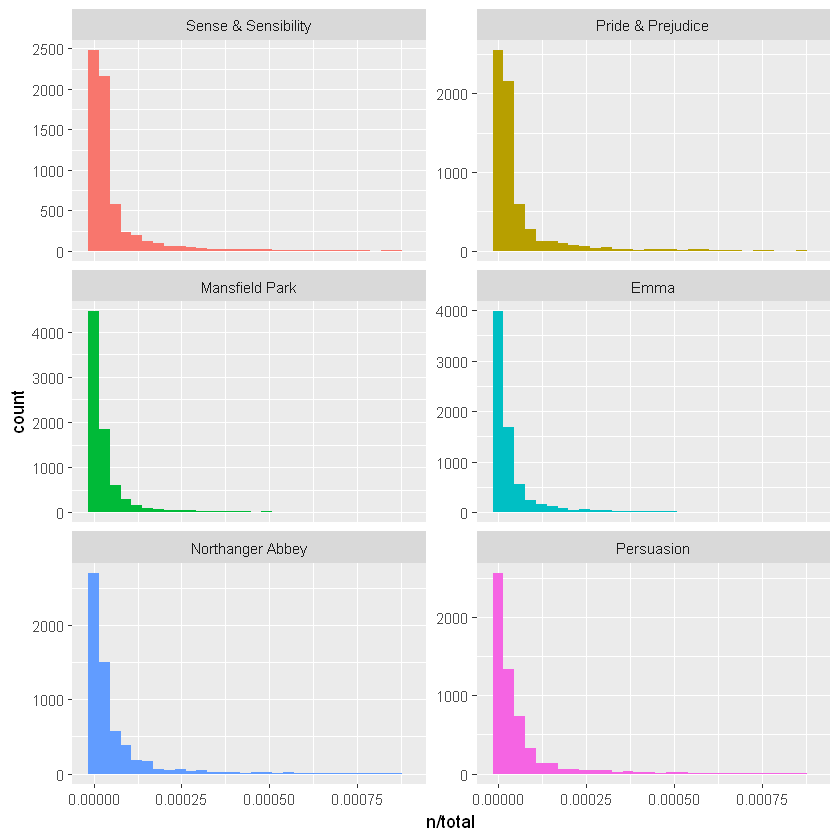

In [7]:
library(ggplot2)

ggplot(book_words, aes(n/total, fill = book)) +
  geom_histogram(show.legend = FALSE) +
  xlim(NA, 0.0009) +
  facet_wrap(~book, ncol = 2, scales = "free_y")

- geom_histogram : 히스토그램 그리기
- xlim(NA, 0.0009) : x 좌표축 값의 범위, NA = 0.0009, 최댓값이 0.0009라는 의미입니다.
- 모든 소설이 오른쪽 꼬리가 긴 그래프로 형성이 됩니다.
- 긴 꼬리 분포는 자연어 모음에서 매우 일반적입니다.

### 3.2 Zipf's law

- 앞서 시각화한 내용과 밑에 시각화 할 내용들을 우리는 **지프의 법칙**이라고 합니다.
- 지프의 법칙은 데이터의 순위와 빈도를 각 축에 로그 스케일로 나타낸 그래프를 통해 쉽게 확인할 수 있습니다.
- 우리는 Jane Austen의 소설에 대한 지프의 법칙을 조사해보겠습니다.

책 안에 단어 별로 단어 빈도 구하고 순위 매기기

In [8]:
freq_by_rank <- book_words %>% 
  group_by(book) %>% 
  mutate(rank = row_number(), 
         `term frequency` = n/total) %>%
  ungroup()

freq_by_rank

book,word,n,total,rank,term frequency
Mansfield Park,the,6206,160460,1,0.03867631
Mansfield Park,to,5475,160460,2,0.03412065
Mansfield Park,and,5438,160460,3,0.03389007
Emma,to,5239,160996,1,0.03254118
Emma,the,5201,160996,2,0.03230515
Emma,and,4896,160996,3,0.03041069
Mansfield Park,of,4778,160460,4,0.02977689
Pride & Prejudice,the,4331,122204,1,0.03544074
Emma,of,4291,160996,4,0.02665284
Pride & Prejudice,to,4162,122204,2,0.03405780


시각화

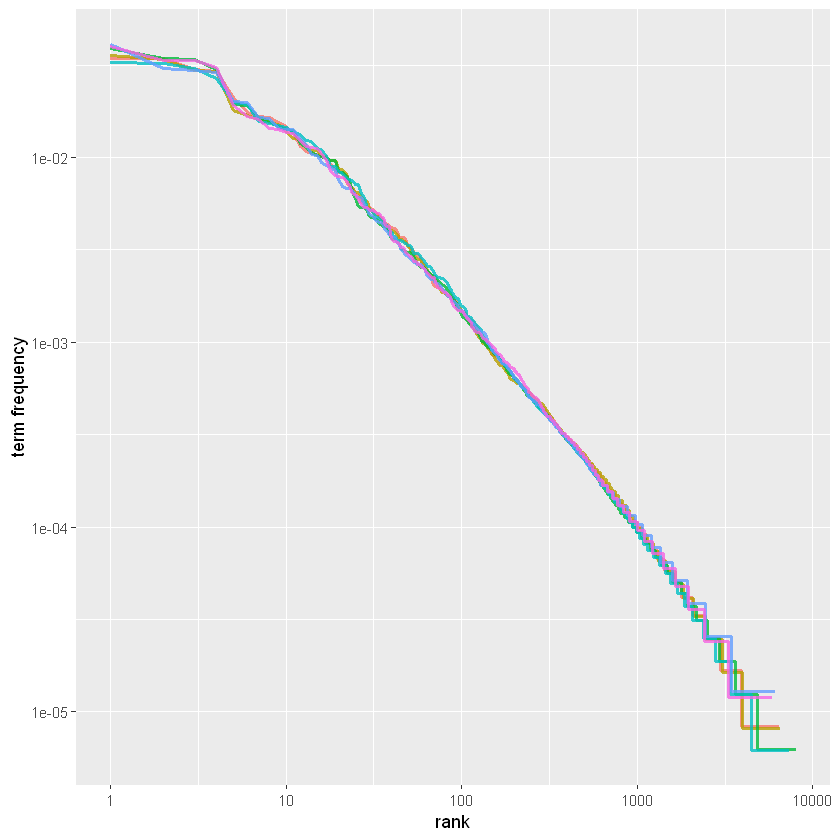

In [9]:
freq_by_rank %>% 
  ggplot(aes(rank, `term frequency`, color = book)) + 
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + 
  scale_x_log10() +
  scale_y_log10()

- geom_line(size=1.1, alpha=0.8) : 선 그래프 그리기, alpha는 투명도를 의미 
- scale_x_log10(), y_log10() : x축의 scale을 log10으로 변환 (x,y축의 범위를 늘림) 
- 순위별로 점차적으로 단어 빈도가 낮아지는 것을 확인할 수 있습니다.
- 지프의 법칙은 로그 눈금에서 x축에 순위를 표시하고 y축에 빈도를 표시하여 종종 시각화된다고 합니다.
- 반비례 관계와, 음의 기울기를 가집니다.
- 3부분의 power row 법칙을 가집니다.
- 위 그래프를 보면 6가지의 책이 다 비슷한 shape를 가지는 것을 알 수있습니다.

**broken power low?!**

In [10]:
rank_subset <- freq_by_rank %>% 
  filter(rank < 500,
         rank > 10)

rank_subset

book,word,n,total,rank,term frequency
Mansfield Park,she,2246,160460,11,0.013997258
Emma,in,2189,160996,11,0.013596611
Emma,not,2140,160996,12,0.013292256
Emma,you,1980,160996,13,0.012298442
Emma,be,1975,160996,14,0.012267386
Mansfield Park,be,1904,160460,12,0.011865886
Mansfield Park,not,1815,160460,13,0.011311230
Emma,he,1806,160996,15,0.011217670
Emma,that,1788,160996,16,0.011105866
Mansfield Park,as,1702,160460,14,0.010607005


In [11]:
lm(log10(`term frequency`) ~ log10(rank), data = rank_subset)


Call:
lm(formula = log10(`term frequency`) ~ log10(rank), data = rank_subset)

Coefficients:
(Intercept)  log10(rank)  
    -0.6226      -1.1125  


- lm() : linear regression의 핵심으로 회귀분석, 단일 계층 분석, 공분산 분석에 이용할 수 있습니다.
- 지프의 법칙에서 frequency와 rank는 반비례 관계임을 확인할 수 있습니다.
- 기울기 또한 -1.11이므로 -1에 가까운 기울기를 얻었습니다.
- 이 직선을 위 그래프에다가 넣어보면 다음과 같습니다.

lm을 통해 얻은 식 긋기

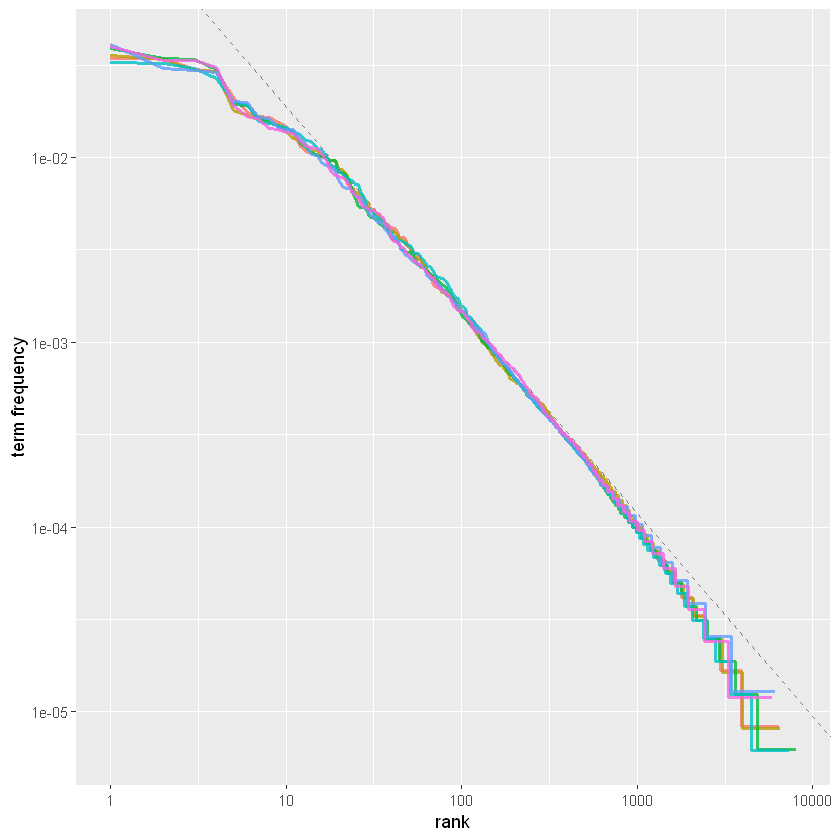

In [12]:
freq_by_rank %>% 
  ggplot(aes(rank, `term frequency`, color = book)) + 
  geom_abline(intercept = -0.62, slope = -1.1, 
              color = "gray50", linetype = 2) +
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + 
  scale_x_log10() +
  scale_y_log10()

- geom_abline : 기울기, 절편을 설정하여 선을 그릴 수 있는 옵션입니다.
- 단일 거듭 제곱 법칙으로 예측되는 것보다 적은 수의 희귀 단어가 포함됩니다.
- Jane Austen은 많은 언어 모음보다 가장 일반적인 단어의 낮은 비율을 사용합니다.
- tidy text 원칙을 사용하여 간단히 구현할 수 있습니다.

### 3.3 The bind_tf_idf() Function

- Jane Austen 소설에서 중요하지만 너무 일반적이지 않는 단어를 찾으려고 합니다.
- tidytext 패키지의 bind_tf_idf() 함수는 문서당 term 하나의 행이 있는 tidy text 데이터를 사용합니다.

bind_tf_idf 함수 이용하기

In [13]:
book_tf_idf <- book_words %>%
  bind_tf_idf(word, book, n)

head(book_tf_idf, n=10)

book,word,n,total,tf,idf,tf_idf
Mansfield Park,the,6206,160460,0.03867631,0,0
Mansfield Park,to,5475,160460,0.03412065,0,0
Mansfield Park,and,5438,160460,0.03389007,0,0
Emma,to,5239,160996,0.03254118,0,0
Emma,the,5201,160996,0.03230515,0,0
Emma,and,4896,160996,0.03041069,0,0
Mansfield Park,of,4778,160460,0.02977689,0,0
Pride & Prejudice,the,4331,122204,0.03544074,0,0
Emma,of,4291,160996,0.02665284,0,0
Pride & Prejudice,to,4162,122204,0.03405780,0,0


- 일반적으로 사용되는 단어들은 idf가 0이기 때문에 tf-idf를 계산해도 0이 나옵니다.

필요한 변수 추출

In [15]:
filter(book_tf_idf %>%
  select(-total) %>%
  arrange(desc(tf_idf)) %>% top_n(10))

Selecting by tf_idf


book,word,n,tf,idf,tf_idf
Sense & Sensibility,elinor,623,0.005193528,1.791759,0.009305552
Sense & Sensibility,marianne,492,0.004101470,1.791759,0.007348847
Mansfield Park,crawford,493,0.003072417,1.791759,0.005505032
Pride & Prejudice,darcy,373,0.003052273,1.791759,0.005468939
Persuasion,elliot,254,0.003036171,1.791759,0.005440088
Emma,emma,786,0.004882109,1.098612,0.005363545
Northanger Abbey,tilney,196,0.002519928,1.791759,0.004515105
Emma,weston,389,0.002416209,1.791759,0.004329266
Pride & Prejudice,bennet,294,0.002405813,1.791759,0.004310639
Persuasion,wentworth,191,0.002283105,1.791759,0.004090775


- select : 필요한 변수 추출, 이때 -가 앞에 붙어지면 이 변수만 제외하겠다는 의미
- arrange : 순서대로 정렬하기, desc는 내림차순

시각화

Warning message:
"package 'forcats' was built under R version 3.6.3"

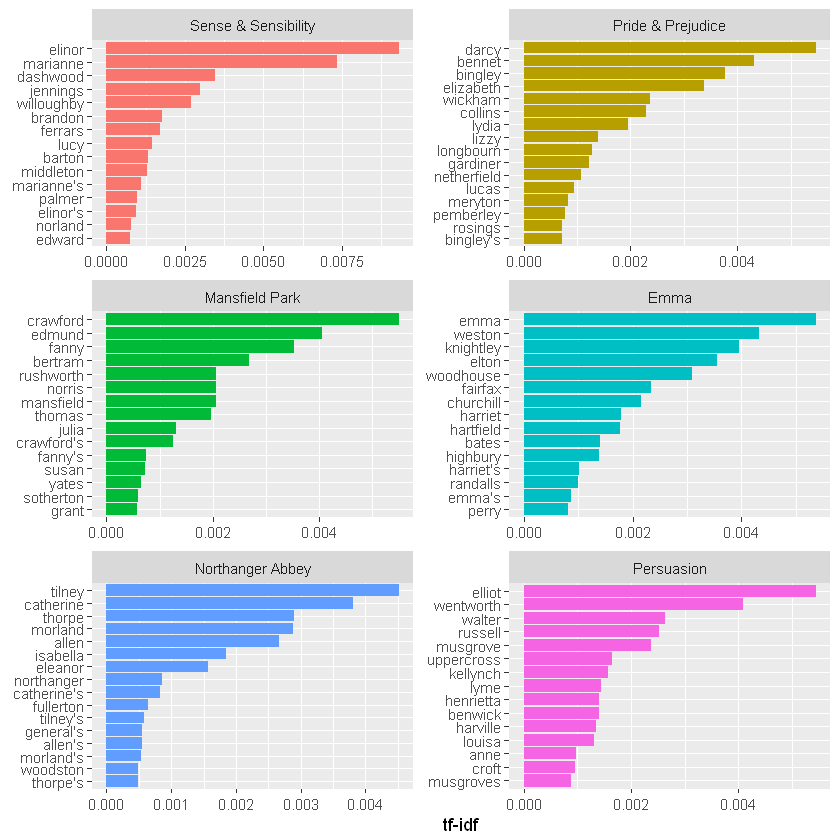

In [16]:
library(forcats)

book_tf_idf %>%
  group_by(book) %>%
  slice_max(tf_idf, n = 15) %>%
  ungroup() %>%
  ggplot(aes(tf_idf, fct_reorder(word, tf_idf), fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = "free") +
  labs(x = "tf-idf", y = NULL)

- tf-idf로 측정한 단어들은 각 소설에서 가장 중요한 부분입니다.
- 살펴보면 6편의 소설에서 비슷한 용어를 사용했으며 작품에서 나머지 소설과 구분하는 것은 **고유 명사, 사람과 장소의 이름**입니다.
- tf-idf의 요점은 문서 모음 내에서 하나의 문서에 중요한 단어를 식별한다는 것입니다.

### 3.4 A corpus of physics texts

- 어떤 용어가 중요한지 다시 한 번 알아보기 위해서 다른 문서 말뭉치를 사용합니다.
- **Project Gutenberg**에서 물리학의 고전 교재 다운로드 후 tf-idf로 중요한 용어를 측정해보겠습니다.

- 책 본문이랑 똑같이 하면 에러가 납니다. 지원을 안해준다고 합니다. 따라서 밑의 코드처럼 실행해줍니다.

In [2]:
library(gutenbergr)
wuthering_heights <- gutenberg_download(768, mirror = "http://mirrors.xmission.com/gutenberg/")

physics <- gutenberg_download(c(37729, 14725, 13476, 30155),    # physics 변수 생성
                              meta_fields = "author")

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org


In [6]:
head(physics, n=10)

gutenberg_id,text,author
13476,EXPERIMENTS WITH ALTERNATE CURRENTS OF HIGH POTENTIAL AND HIGH FREQUENCY,"Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,"A Lecture Delivered before the Institution of Electrical Engineers, London","Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,by,"Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,NIKOLA TESLA,"Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,With a Portrait and Biographical Sketch of the Author,"Tesla, Nikola"
13476,,"Tesla, Nikola"


In [7]:
tail(physics, n=10)

gutenberg_id,text,author
37729,"Page 59, potential printer's error, sidenote ends with comma, 'Or","Galilei, Galileo"
37729,"rather Contiguity,'.","Galilei, Galileo"
37729,,"Galilei, Galileo"
37729,"Page 61, missing letter a, 'that in this c{a}se the water,'.","Galilei, Galileo"
37729,,"Galilei, Galileo"
37729,"Page 74, printer's error, ir for it, 'but if we do saw ir,'.","Galilei, Galileo"
37729,,"Galilei, Galileo"
37729,"Page 75, unclear symbol in original text '{&}c. making seven","Galilei, Galileo"
37729,Segments'.,"Galilei, Galileo"
37729,],"Galilei, Galileo"


-> gutenberg_id에 따라 잘 다운이 된 것을 확인할 수 있습니다.

text로 분리하고 count

In [11]:
library(dplyr)
library(tidytext)
physics_words <- physics %>%
  unnest_tokens(word, text) %>%
  count(author, word, sort = TRUE)

head(physics_words, n=15)

author,word,n
"Galilei, Galileo",the,3760
"Tesla, Nikola",the,3604
"Huygens, Christiaan",the,3553
"Einstein, Albert",the,2993
"Galilei, Galileo",of,2049
"Einstein, Albert",of,2028
"Tesla, Nikola",of,1737
"Huygens, Christiaan",of,1708
"Huygens, Christiaan",to,1207
"Tesla, Nikola",a,1176


-> 각 텍스트에서 단어가 몇 번 사용되었는지 확인합니다.

작가별 tf-idf 단어 시각화

In [12]:
plot_physics <- physics_words %>%
  bind_tf_idf(word, author, n) %>%
  mutate(author = factor(author, levels = c("Galilei, Galileo",
                                            "Huygens, Christiaan", 
                                            "Tesla, Nikola",
                                            "Einstein, Albert")))

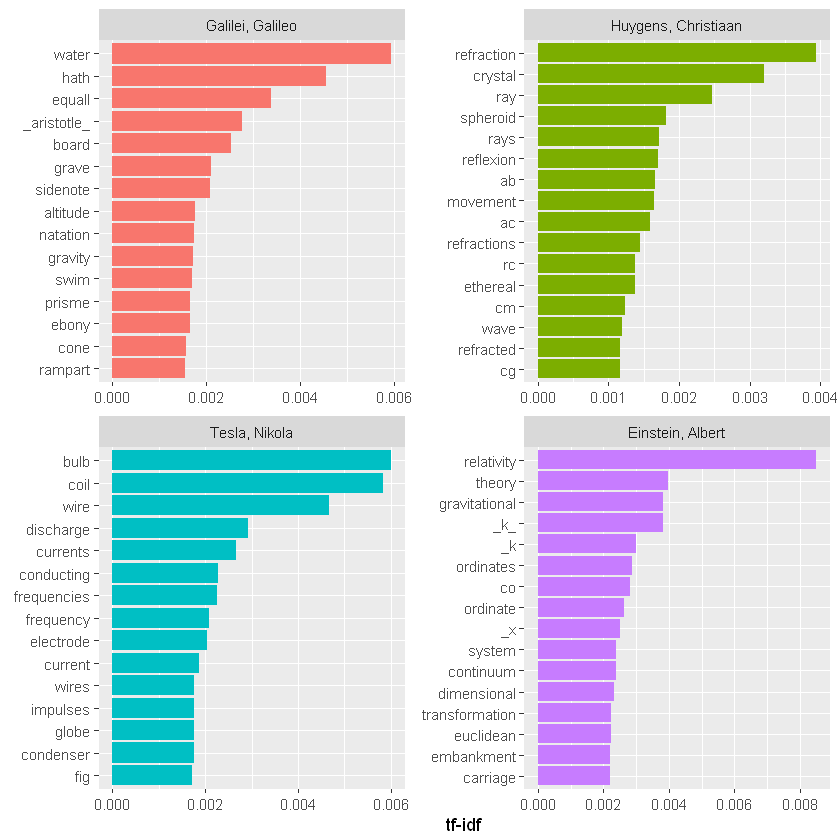

In [14]:
library(ggplot2)
plot_physics %>% 
  group_by(author) %>% 
  slice_max(tf_idf, n = 15) %>% 
  ungroup() %>%
  mutate(word = reorder(word, tf_idf)) %>%
  ggplot(aes(tf_idf, word, fill = author)) +
  geom_col(show.legend = FALSE) +
  labs(x = "tf-idf", y = NULL) +
  facet_wrap(~author, ncol = 2, scales = "free")

- Einstein 그래프를 보시면 k가 있습니다.
- 이는 아인슈타인 좌표계 이름을 의미합니다.

텍스트 청소

- 이 단원에서는 필요없는 텍스트를 필터로 제거하는 작업을 하고 있습니다.
- 이를 통해 더욱 유의미한 단어들을 추출하려는 것입니다.

In [15]:
library(stringr)

physics %>% 
  filter(str_detect(text, "_k_")) %>% 
  select(text)

Warning message:
"package 'stringr' was built under R version 3.6.3"

text
surface AB at the points AK_k_B. Then instead of the hemispherical
would needs be that from all the other points K_k_B there should
"necessarily be equal to CD, because C_k_ is equal to CK, and C_g_ to"
"the crystal at K_k_, all the points of the wave CO_oc_ will have"
"O_o_ has reached K_k_. Which is easy to comprehend, since, of these"
"CO_oc_ in the crystal, when O_o_ has arrived at K_k_, because it forms"
ρ is the average density of the matter and _k_ is a constant connected


In [16]:
physics %>% 
  filter(str_detect(text, "RC")) %>% 
  select(text)

text
"line RC, parallel and equal to AB, to be a portion of a wave of light,"
"represents the partial wave coming from the point A, after the wave RC"
"be the propagation of the wave RC which fell on AB, and would be the"
"transparent body; seeing that the wave RC, having come to the aperture"
incident rays. Let there be such a ray RC falling upon the surface
"CK. Make CO perpendicular to RC, and across the angle KCO adjust OK,"
"the required refraction of the ray RC. The demonstration of this is,"
explaining ordinary refraction. For the refraction of the ray RC is
"29. Now as we have found CI the refraction of the ray RC, similarly"
"the ray _r_C is inclined equally with RC, the line C_d_ will"


필요없는 단어 tibble 형식으로 저장

In [18]:
mystopwords <- tibble(word = c("eq", "co", "rc", "ac", "ak", "bn", 
                                   "fig", "file", "cg", "cb", "cm",
                               "ab", "_k", "_k_", "_x"))

anti_join으로 제거(anti_join은 Chapter2에 나옵니다.)

In [19]:
physics_words <- anti_join(physics_words, mystopwords, 
                           by = "word")

다시 시각화

In [22]:
install.packages("forcats")

package 'forcats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hu612\AppData\Local\Temp\Rtmp4M8CHE\downloaded_packages


In [25]:
library(forcats)
plot_physics <- physics_words %>%         # plot_words 변수 활용
  bind_tf_idf(word, author, n) %>%
  # bind_tf_idf 함수 사용
  # word = 텍스트 데이터 집합, author = 문서ID를 포함하는 열, n = 문서 용어 수를 포함하는 열)
  
  mutate(word = str_remove_all(word, "_")) %>%
  # str_remove_all = 해당 패턴 모두 삭제
  
  group_by(author) %>%    # author 변수 기준으로 그룹화
  slice_max(tf_idf, n = 15) %>%   # slice_max() = 가장 큰 n개의 행 선택
  ungroup() %>%   # 그룹화 해제
  mutate(word = fct_reorder(word, tf_idf)) %>%
  # fct_reorder = factor화를 통해 x축 컬럼을 sort
  
  mutate(author = factor(author, levels = c("Galilei, Galileo",
                                            "Huygens, Christiaan",
                                            "Tesla, Nikola",
                                            "Einstein, Albert")))

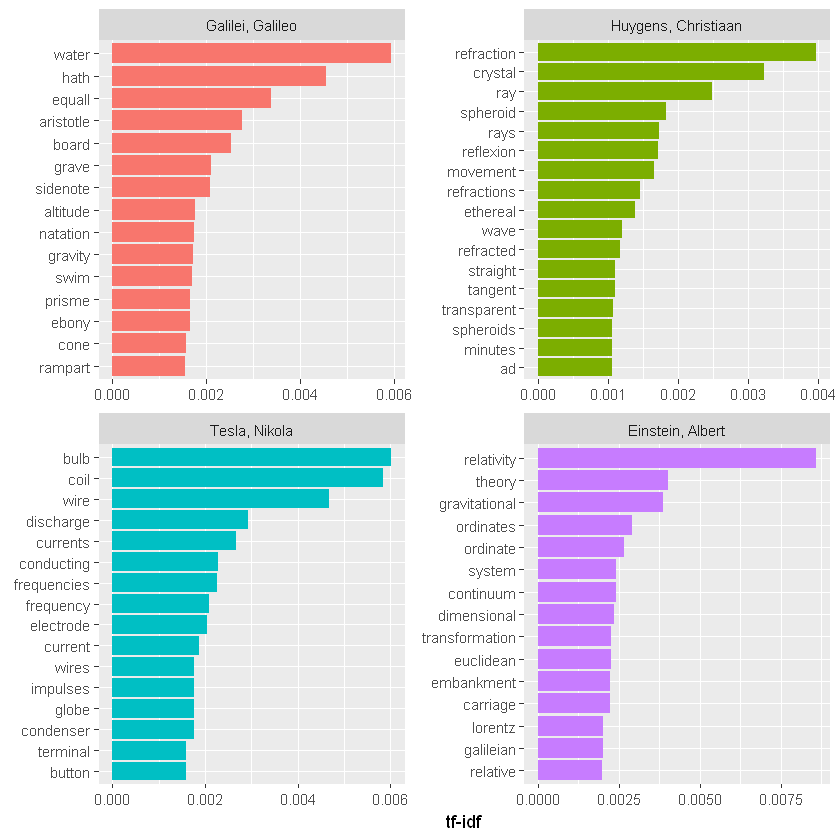

In [24]:
ggplot(plot_physics, aes(tf_idf, word, fill = author)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~author, ncol = 2, scales = "free") +
  labs(x = "tf-idf", y = NULL)

- 의미없는 단어들을 제거하여 더 의미 있는 시각화를 하였습니다.

### [마무리]
- tf와 idf를 사용하면 문서 모음 내에서 하나의 문서에 고유한 단어를 찾을 수 있습니다.
- 문서 모음 또는 말뭉치 내에서 서로 다른 단어가 얼마나 중요한지 확인이 가능합니다.

### 감사합니다.

### [Reference]
[1] https://www.tidytextmining.com/tidytext.html<br>
[2] https://hoon427.tistory.com/83<br>
[3] https://bookdown.org/ahn_media/bookdown-demo/browse.html<br>